In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Early Classification of Diabetes.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [4]:
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
# Encoding
label_encoder = LabelEncoder() 
data['gender'] = label_encoder.fit_transform(data['gender'])

data.head(10)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [7]:
# Choosing the features and the label
X = data.drop('class',axis=1)
y = data['class']

In [8]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape),print(y_train.shape)
print(X_test.shape),print(y_test.shape)

(416, 16)
(416,)
(104, 16)
(104,)


(None, None)

<a id="22"></a> <br>
## Min-Max Normalization

In [9]:
# Scaling
encoder = MinMaxScaler()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

pd.DataFrame(X_train, columns = X.columns)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,0.148649,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.418919,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.675676,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.418919,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.662162,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.324324,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,0.148649,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,0.729730,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
414,0.432432,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
%load_ext autotime

time: 0 ns (started: 2023-03-04 23:46:10 +05:30)


# Logistic Regression

In [11]:
lr=LogisticRegression()

params={
    'C':[1,2,3,4,5],
    'penalty':['l1', 'l2', 'elasticnet', None],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    'max_iter':[100,500,1000]
}

GSlr=GridSearchCV(lr,param_grid=params)
GSlr.fit(X_train,y_train)
print(GSlr.best_params_)
print(GSlr.best_score_)

{'C': 1, 'max_iter': 100, 'penalty': None, 'solver': 'saga'}
0.9159781985083189
time: 6.53 s (started: 2023-03-04 23:46:12 +05:30)


# Support Vector Machine (Support Vector Classifier)

In [12]:
svc=SVC()

params={
    'C':[1,2,3,4,5],
    'kernel':['poly','rbf','sigmoid'],
    'gamma':['auto','scale']
}
GSsvm=GridSearchCV(svc,param_grid=params,n_jobs=1)
GSsvm.fit(X_train,y_train)
print(GSsvm.best_params_)
print(GSsvm.best_score_)

{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}
0.9688181296615032
time: 500 ms (started: 2023-03-04 23:46:18 +05:30)


# Random Forest Classification

In [13]:
rf=RandomForestClassifier()

params={
    'min_samples_split':[2,4,6],
    "min_samples_leaf":[1,2,3,4],
    'max_features':['auto','log2',None]
}

GSrf=GridSearchCV(rf,param_grid=params)
GSrf.fit(X_train,y_train)
print(GSrf.best_params_)
print(GSrf.best_score_)

{'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9688181296615032
time: 23.2 s (started: 2023-03-04 23:46:19 +05:30)


# MLP

In [14]:
mlp = MLPClassifier()

params={
    'max_iter':[500],
    'alpha':[1],
    'activation':['identity', 'logistic', 'tanh', 'relu']
}

GSmlp=GridSearchCV(mlp,param_grid=params)
GSmlp.fit(X_train, y_train)
print(GSmlp.best_params_)
print(GSmlp.best_score_)

{'activation': 'relu', 'alpha': 1, 'max_iter': 500}
0.9303499713138267
time: 16.5 s (started: 2023-03-04 23:46:42 +05:30)


In [15]:
GSlr.score(X_test,y_test)

0.9519230769230769

time: 0 ns (started: 2023-03-04 23:46:59 +05:30)


# Results

In [16]:
results={
    'Algorithm':['LogisticRegression','SVC','RandomForestClassifier','MLPClassifier'],
    'HyperParameters':[GSlr.best_params_,GSsvm.best_params_,GSrf.best_params_,GSmlp.best_params_],
    'Best_Score':[GSlr.best_score_,GSsvm.best_score_,GSrf.best_score_,GSmlp.best_score_],
    'Accuracy':[GSlr.score(X_test,y_test),GSsvm.score(X_test,y_test),GSrf.score(X_test,y_test),GSmlp.score(X_test,y_test)]
}

resultsdf=pd.DataFrame(results)
resultsdf.sort_values(by=['Best_Score'],ascending=False,inplace=True)
resultsdf

,Algorithm,HyperParameters,Best_Score,Accuracy
1,SVC,"{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}",0.968818,1.000000
2,RandomForestClassifier,"{'max_features': 'log2', 'min_samples_leaf': 1...",0.968818,0.990385
3,MLPClassifier,"{'activation': 'relu', 'alpha': 1, 'max_iter':...",0.930350,0.951923
0,LogisticRegression,"{'C': 1, 'max_iter': 100, 'penalty': None, 'so...",0.915978,0.951923


time: 31 ms (started: 2023-03-04 23:46:59 +05:30)


## Evaluation

In [17]:
RFC=cross_val_score(GSrf,X_train,y_train,cv=5)
SVC=cross_val_score(GSsvm,X_train,y_train,cv=5)
print(f'RFC {np.average(RFC)*100}')
print(f'SVC {np.average(SVC)}*100')

RFC 96.64084911072862
SVC 0.9664371772805508*100
time: 1min 48s (started: 2023-03-04 23:47:19 +05:30)


In [18]:
y_pred = GSrf.predict(X_test)
labels = target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99        40
     Class 1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

time: 15 ms (started: 2023-03-04 23:49:11 +05:30)


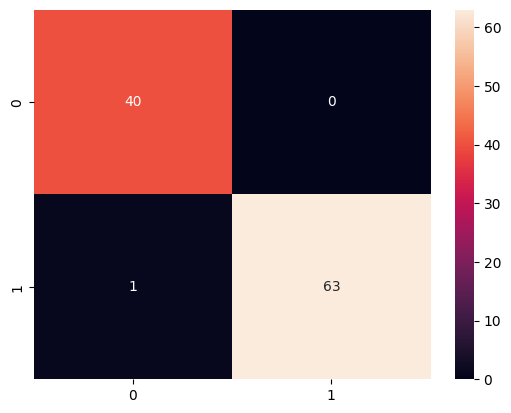

time: 219 ms (started: 2023-03-04 23:49:17 +05:30)


In [19]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_lr,annot=True);

In [21]:
print(GSrf.score(X_train,y_train),GSrf.score(X_test,y_test))
print(GSsvm.score(X_train,y_train),GSrf.score(X_test,y_test))

1.0 0.9903846153846154
0.9903846153846154 0.9903846153846154
time: 31 ms (started: 2023-03-04 23:50:04 +05:30)


In [22]:
import pickle

pickle.dump(GSrf,open('Early Classification of Diabetes.pkl','wb'))

time: 0 ns (started: 2023-03-04 23:50:24 +05:30)
